# 441B Assignment #2

## Pregya Vijayakumar

# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
# Getting our dataset
df.head()

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


In [4]:
#Difference in Stock Price
df["Diff"] = df["Adj Close"].diff().shift(-1)

#Target Variable (if the stock price went up or down)
df["Target"] = np.sign(df["Diff"])

# Option Premium 
df["Premium"] = .08 * df["Adj Close"]

In [5]:
# The new dataset with all columns
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, and build a LogReg on column 2

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [7]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [8]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

In [9]:
# Fitting our logistic regression

logreg = LogisticRegression()

logreg.fit(X, y)

LogisticRegression()

# 4.) Add columns, prediction and profits.

In [10]:
# Getting our predictions

y_pred = logreg.predict(X)

In [11]:
# Adding our predictions to the data
df["Predictions"] = y_pred

In [12]:
# Adding profits to the data
df["Profits"] = 0

In [13]:
df.head()

,Adj Close,Diff,Target,Premium,Predictions,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0


In [17]:
#True Positives (Profit)
df.loc[(df["Target"] == 1) & (df["Predictions"] == 1), "Profits"] = df["Premium"]

#False Positives (Profit)
df.loc[(df["Target"] == -1) & (df["Predictions"] == 1), "Profits"] = 100 * df["Diff"] + df["Premium"]

#False Negative and True Negatives are 0 here in this case

In [19]:
# Our Final dataset including profits we get
df.head()

,Adj Close,Diff,Target,Premium,Predictions,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842


# 5.) Plot profits over time

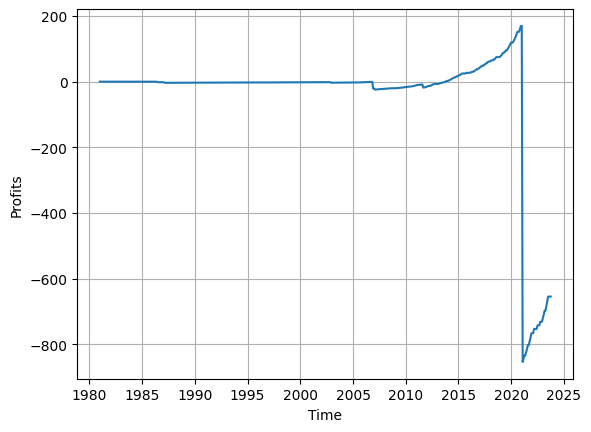

In [15]:
# Plotting our profits 
plt.plot(np.cumsum(df["Profits"]))
plt.grid()
plt.xlabel("Time")
plt.ylabel("Profits")
plt.show()

 (Profits fall because of covid; getting small returns but penalized a lot when market falls)

# 5.5) Short Write up on how you see your skills valuable to PJ and/or Philip Liu

I have been interested in cryptocurrency and worked with some real world data as to which tokens/ exchanges are best fit for different demographics and I wish to learn more from the consumer side about the reason behind investments and I think these may be beneficial and valuable to the work PJ is doing. 


I am excited about the idea of contributing to PJ's exploration of behavioral analysis of the cryptocurrency trades conducted on the Stars Arena app. I am deeply interested in working in the field of behavioral analysis and understanding the reason why people make certain choices. My passion for understanding human decision-making is reflected in the Applied Project I worked on in the Fall where my team conducted sentiment analysis on emails to understand better how and when UCLA Alumni interact with the events hosted by the Alumni Association. This practical experience, complemented with reading and research on the subject is what I believe would be valuable to PJ.

In addition, in my previous roles I have worked in the field of cryptocurrency to help identify the optimal tokens and exchanges for diverse demographics. I would love understand how consumers and people make decisions and invest in Crypto Markets.